In [7]:
import numpy #for matrices
import scipy.special #for sigmoid
import matplotlib.pyplot
%matplotlib inline

In [31]:
class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        self.lr = learningrate
        
        #activation function, expit is sigmoid
        self.activation_function = lambda x: scipy.special.expit(x)
        
        #weights inside the arrays are w_i_j
        #where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc
        self.wih = numpy.random.normal(0.0,pow(self.hnodes, -0.5),(self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0,pow(self.onodes, -0.5),(self.onodes, self.hnodes))
    
    #train the neural net
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        #input & hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #hidden layer & output
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        #error is target-actual
        output_errors = targets - final_outputs
        
        #hidden error is the output errors, split by weights, recombinded at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)

        #update weights between hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        #update weights between input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
    
    #query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        #input & hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        #hidden layer & output
        final_inputs = numpy.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [32]:
input_nodes = 784
hidden_nodes = 500
output_nodes = 10
learning_rate = 0.1

n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [3]:
training_data_file = open("../mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

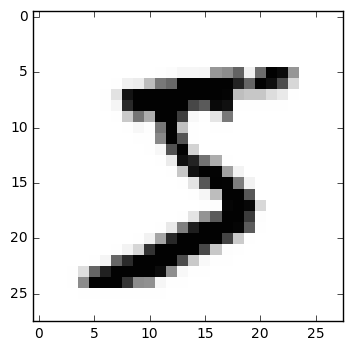

In [6]:
all_values = training_data_list[0].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [33]:
# TRAIN IT

epochs = 5
for e in range(epochs):
    for record in training_data_list:
        #split via comma
        all_values = record.split(',')
        # scale and shift inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0*0.99) + 0.01
        # create the target output values (all 0.01 except desired label which will be 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # the first place in the csv array is the label
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)

In [7]:
test_data_file = open("../mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [41]:
#test it

scorecard = []

for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    #print(correct_label, "correct label")
    inputs = (numpy.asfarray(all_values[1:]) / 255.0*0.99) + 0.01
    
    outputs = n.query(inputs)
    
    label = numpy.argmax(outputs)
    #print(label, "network's answer")
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)

scorecard_array = numpy.asfarray(scorecard)

print ("performance = ", scorecard_array.sum() / scorecard_array.size)

('performance = ', 0.9758)


(5, 'correct label')
[[ 0.11731013]
 [ 0.00920052]
 [ 0.00316202]
 [ 0.32036778]
 [ 0.00401094]
 [ 0.72600485]
 [ 0.00796437]
 [ 0.00750012]
 [ 0.00646304]
 [ 0.0033441 ]]
(5, "network's answer")


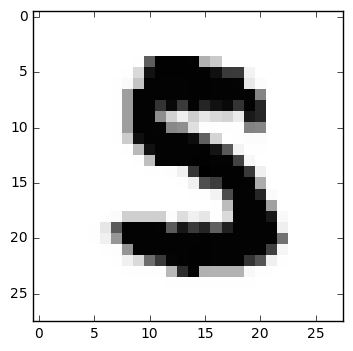

In [73]:
#query it
import random

scorecard = []

#choose a random number to test
whichNumber = random.randint(0,len(test_data_list))

record = test_data_list[whichNumber]
all_values = record.split(',')

correct_label = int(all_values[0])
print(correct_label, "correct label")
inputs = (numpy.asfarray(all_values[1:]) / 255.0*0.99) + 0.01

#our predections
outputs = n.query(inputs)
print outputs

label = numpy.argmax(outputs)
print(label, "network's answer")

image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')
